In [42]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 101.3 MB/s eta 0:00:00


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
import keras
import seaborn as sns
import h5py
import cv2
import os
from transformers import pipeline
import tarfile

#1
##A

In [3]:
data = h5py.File('/content/drive/MyDrive/AI-ML/Neural Networks/Mini Project/Data/Autonomous_Vehicles_SVHN_single_grey1.h5')

##1B

In [5]:
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

##1C

In [6]:
xtest = data['X_test']
xtrain = data['X_train']
xval = data['X_val']
ytrain = data['y_train']
ytest = data['y_test']
yval = data['y_val']

#2
##A

In [6]:
print(xtrain.shape,xtest.shape,xval.shape,ytrain.shape,ytest.shape,yval.shape)

(42000, 32, 32) (18000, 32, 32) (60000, 32, 32) (42000,) (18000,) (60000,)


##2B

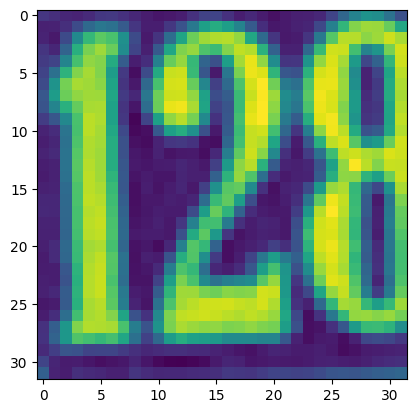

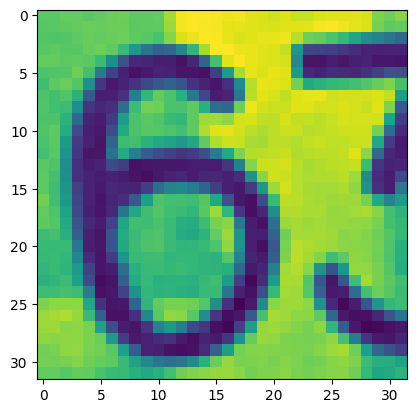

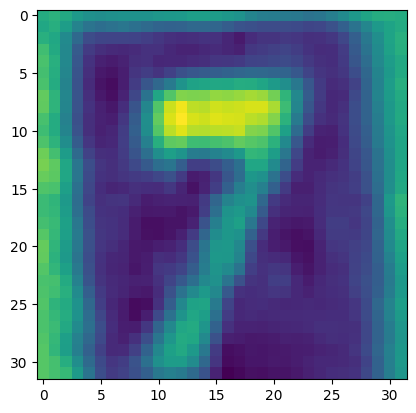

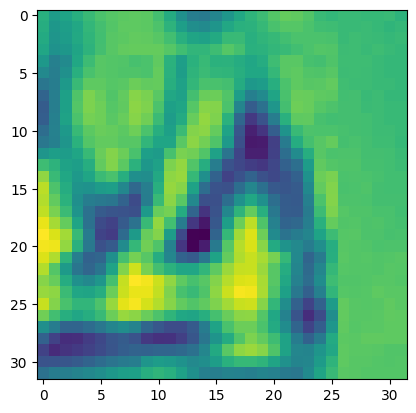

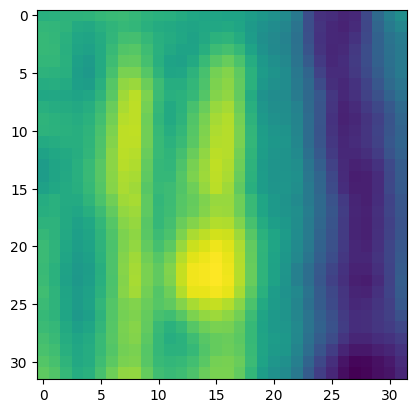

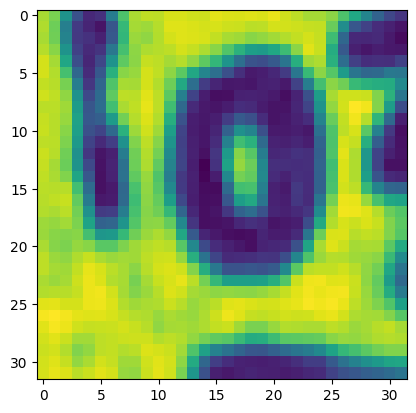

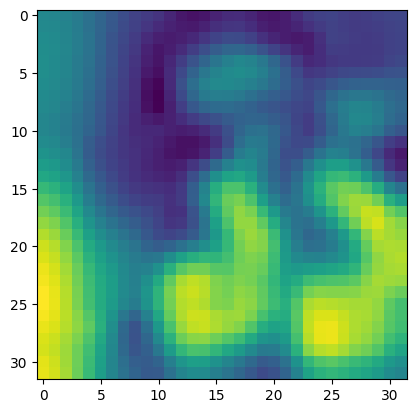

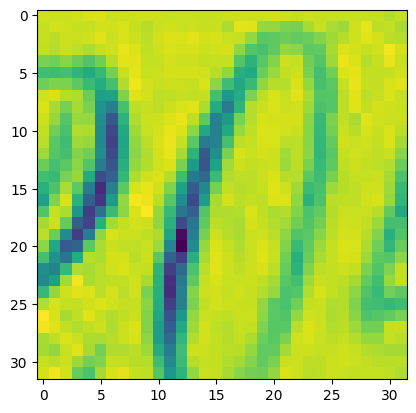

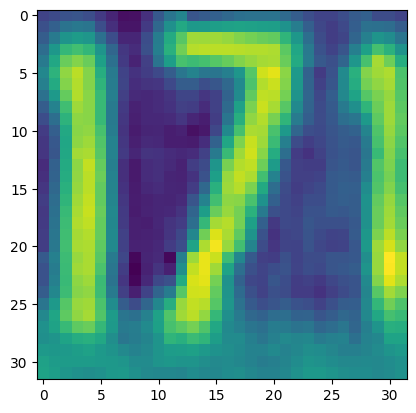

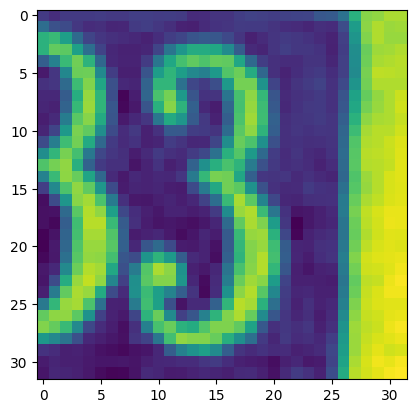

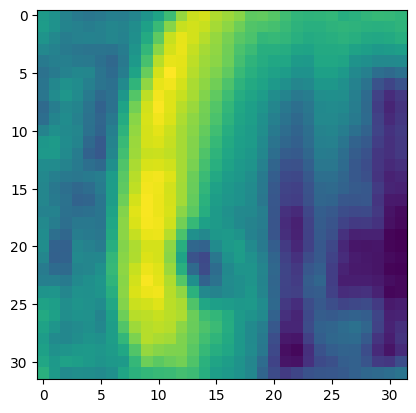

In [7]:
for i in range(0,11):
    plt.subplots()
    plt.imshow(xtrain[i])    

##2C

In [7]:
def imgbulkresize(data,dsize):
    %timeit
    data1 = np.array([[[]]])
    for i in range(1,data.shape[0]):
        np.append(data1,cv2.resize(data[i],(dsize,dsize)),axis = 0)
    print('job done')

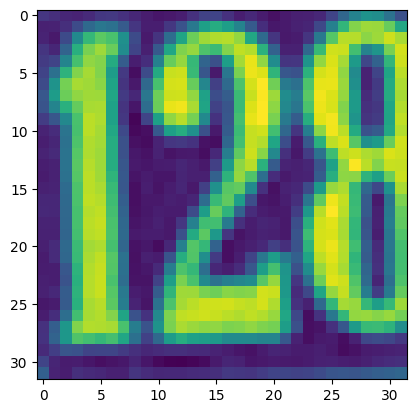

In [8]:
plt.imshow(xtrain[0])

In [9]:
xtr_28 = np.zeros((xtrain.shape[0],28,28))
for i in range(xtrain.shape[0]):
    xtr_28[i,:,:] = cv2.resize(xtrain[i],dsize=(28,28),interpolation = cv2.INTER_CUBIC)


xte_28 = np.zeros((xtest.shape[0],28,28))
for i in range(xtest.shape[0]):
    xte_28[i,:,:] = cv2.resize(xtest[i],dsize=(28,28),interpolation = cv2.INTER_CUBIC)

print(xtr_28.shape)
print(xte_28.shape)

(42000, 28, 28)
(18000, 28, 28)


In [10]:
xtr_28_rhp = xtr_28.reshape(xtr_28.shape[0],28,28,1)
xte_28_rhp = xte_28.reshape(xte_28.shape[0],28,28,1)
print(xtr_28_rhp.shape)
print(xte_28_rhp.shape)

(42000, 28, 28, 1)
(18000, 28, 28, 1)


##2D

In [11]:
xtr_28_rhp = xtr_28_rhp.astype('float32')
xte_28_rhp = xte_28_rhp.astype('float32')

xtr_28_rhp /= 255
xte_28_rhp /= 255

##2E

In [13]:
ytr = tf.keras.utils.to_categorical(ytrain,num_classes=10)
yte = tf.keras.utils.to_categorical(ytest,num_classes=10)

##2F

In [12]:
print(np.unique(ytrain))
print(np.unique(ytest))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


#3
##3A

In [14]:
model = tf.keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size = 3,activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(filters=64,kernel_size = 3,activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(.2))
model.add(keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

##3B

In [16]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1.6),loss = 'categorical_crossentropy',metrics='accuracy')

In [17]:
checkpoint_path = R'/content/drive/MyDrive/AI-ML/Neural Networks/Mini Project/Model'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
latest = tf.train.latest_checkpoint(checkpoint_dir)


In [18]:
model.load_weights('/content/drive/MyDrive/AI-ML/Neural Networks/Mini Project/Model')

In [19]:
#model = tf.keras.create_model()

# Restore the weights
#model.load_weights(R'G:\My Drive\AI-ML\Neural Networks\Mini Project.data-00000-of-00001')

history = model.fit(x=xtr_28_rhp
                    ,y=ytr
                    ,validation_data = (xte_28_rhp,yte)
                    ,batch_size = 100
                    ,epochs = 100
                    ,callbacks=[cp_callback]
                    )

Epoch 1/100
420/420 [==============================] - ETA: 0s - loss: 2.3058 - accuracy: 0.1027
Epoch 1: saving model to /content/drive/MyDrive/AI-ML/Neural Networks/Mini Project/Model
420/420 [==============================] - 15s 10ms/step - loss: 2.3058 - accuracy: 0.1027 - val_loss: 2.3061 - val_accuracy: 0.1004
Epoch 2/100
419/420 [============================>.] - ETA: 0s - loss: 2.3062 - accuracy: 0.1006
Epoch 2: saving model to /content/drive/MyDrive/AI-ML/Neural Networks/Mini Project/Model
420/420 [==============================] - 3s 8ms/step - loss: 2.3062 - accuracy: 0.1005 - val_loss: 2.3057 - val_accuracy: 0.0955
Epoch 3/100
414/420 [============================>.] - ETA: 0s - loss: 2.3061 - accuracy: 0.1000
Epoch 3: saving model to /content/drive/MyDrive/AI-ML/Neural Networks/Mini Project/Model
420/420 [==============================] - 3s 7ms/step - loss: 2.3061 - accuracy: 0.1000 - val_loss: 2.3060 - val_accuracy: 0.0955
Epoch 4/100
419/420 [==========================

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [20]:
yte.shape

(18000, 10)

In [21]:
model.save_weights('/content/drive/MyDrive/AI-ML/Neural Networks/Mini Project')

In [22]:
model.save('/content/drive/MyDrive/AI-ML/Neural Networks/Mini Project')

##3D

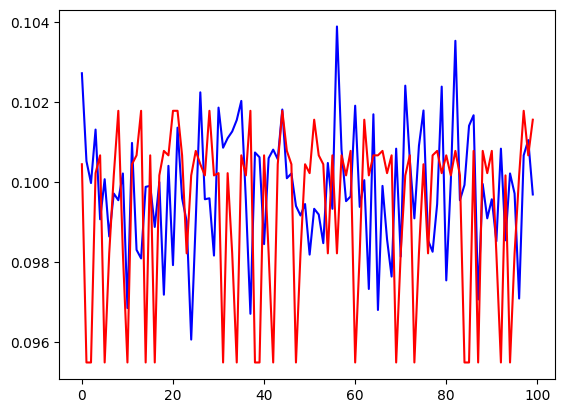

In [39]:
plt.plot(history.history['accuracy'],color = 'b')
plt.plot(history.history['val_accuracy'],color='r')
plt.show()

##3C

In [25]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/AI-ML/Neural Networks/Mini Project/Model')

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [26]:
y = new_model.predict(xte_28_rhp)

563/563 [==============================] - 2s 2ms/step


In [35]:
y_label = []
for i in range(y.shape[0]):
    y_label.append(np.argmax(y[i]))

In [28]:
y_label = pd.DataFrame(y_label,columns=['y_label'])
y_label.value_counts()

y_label
4          18000
dtype: int64

In [38]:
metrics.accuracy_score(ytest,y_label)

0.10066666666666667

* The model is performing poor.
* cannot bring pretrained models because the input resolution is far higher than our dataset
* there are less to none pretrained models on digit recognition alone.
* due to less computational resources, model's training perfomed only with 100 epochs.